In [10]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [3]:
trainDF = pd.read_csv('sentenceTrainDF.csv')
testDF = pd.read_csv('sentenceTestDF.csv')

In [4]:
df = trainDF.copy()

In [5]:
df.head()

,Unnamed: 0,rid,sid,text,category_polarity_list,categorys,category_num
0,0,79,79:0,Being a PC user my whole life....,[],[],0
1,1,79,79:1,This computer is absolutely AMAZING!!!,"[('LAPTOP#GENERAL', 'positive')]",['LAPTOP#GENERAL'],1
2,2,79,79:2,10 plus hours of battery...,"[('BATTERY#OPERATION_PERFORMANCE', 'positive')]",['BATTERY#OPERATION_PERFORMANCE'],1
3,3,79,79:3,super fast processor and really nice graphics ...,"[('CPU#OPERATION_PERFORMANCE', 'positive'), ('...","['CPU#OPERATION_PERFORMANCE', 'GRAPHICS#GENERAL']",2
4,4,79,79:4,and plenty of storage with 250 gb(though I wil...,"[('HARD_DISC#DESIGN_FEATURES', 'positive')]",['HARD_DISC#DESIGN_FEATURES'],1


In [6]:
def getPolaritys(lst):
    return list(map(lambda x: x[1], lst))

In [7]:
df["polaritys"] = df["category_polarity_list"].map(literal_eval).map(getPolaritys)

In [8]:
df["polarity_num"] = df["polaritys"].map(lambda x: len(set(x)))

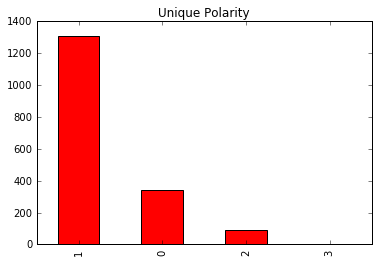

In [12]:
df["polarity_num"].value_counts().plot(kind='bar', color='red', title='Unique Polarity')
plt.savefig('polarity_num.png')

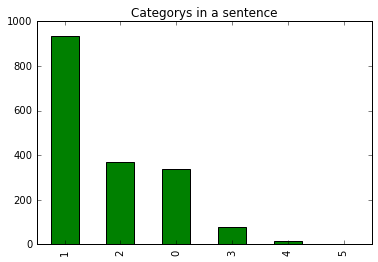

In [215]:
df.category_num.value_counts().plot(kind='bar', color='green', title='Categorys in a sentence')
plt.savefig('category_num.png')

In [13]:
df[df["polarity_num"]==2][["text","category_polarity_list","polaritys"]].head()

,text,category_polarity_list,polaritys
69,It's more expensive but well worth it in the l...,"[('LAPTOP#PRICE', 'negative'), ('LAPTOP#GENERA...","[negative, positive]"
72,"I'm glad I bought this laptop, it was worth th...","[('LAPTOP#GENERAL', 'positive'), ('LAPTOP#PRIC...","[positive, neutral]"
74,I wasn't really as concerned about portability...,"[('LAPTOP#DESIGN_FEATURES', 'neutral'), ('LAPT...","[neutral, positive]"
136,I've haven't had any major problems with the l...,"[('LAPTOP#GENERAL', 'positive'), ('PORTS#QUALI...","[positive, negative]"
151,"A little pricey but it is well, well worth it.","[('LAPTOP#PRICE', 'negative'), ('LAPTOP#GENERA...","[negative, positive]"


In [161]:
df["polarity_num"].count()

1739

In [16]:
# percentage of mixed polarity
df[df["polarity_num"]>=2]["polarity_num"].count()/df["polarity_num"].count()

0.052328924669350199

In [18]:
trainDF = pd.read_csv('trainDF_by_category.csv')

In [19]:
trainDF.head()

,Unnamed: 0,rid,sid,text,category,polarity,attribute,entity
0,0,79,79:0,Being a PC user my whole life....,UNKNOWN#UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,1,79,79:1,This computer is absolutely AMAZING!!!,LAPTOP#GENERAL,positive,GENERAL,LAPTOP
2,2,79,79:2,10 plus hours of battery...,BATTERY#OPERATION_PERFORMANCE,positive,OPERATION_PERFORMANCE,BATTERY
3,3,79,79:3,super fast processor and really nice graphics ...,CPU#OPERATION_PERFORMANCE,positive,OPERATION_PERFORMANCE,CPU
4,4,79,79:3,super fast processor and really nice graphics ...,GRAPHICS#GENERAL,positive,GENERAL,GRAPHICS


In [178]:
trainDF.polarity.value_counts()

positive    1103
negative     765
UNKNOWN      340
neutral      106
Name: polarity, dtype: int64

In [6]:
trainDF.category.value_counts()

LAPTOP#GENERAL                              413
UNKNOWN#UNKNOWN                             340
LAPTOP#DESIGN_FEATURES                      162
LAPTOP#OPERATION_PERFORMANCE                157
LAPTOP#QUALITY                              152
SUPPORT#QUALITY                             129
LAPTOP#USABILITY                            104
LAPTOP#MISCELLANEOUS                         91
LAPTOP#PRICE                                 76
COMPANY#GENERAL                              69
BATTERY#OPERATION_PERFORMANCE                60
LAPTOP#PORTABILITY                           44
LAPTOP#CONNECTIVITY                          32
DISPLAY#QUALITY                              31
SOFTWARE#GENERAL                             23
DISPLAY#DESIGN_FEATURES                      19
KEYBOARD#DESIGN_FEATURES                     18
OS#GENERAL                                   17
SOFTWARE#USABILITY                           16
GRAPHICS#GENERAL                             16
MOUSE#OPERATION_PERFORMANCE             

In [51]:
category_counts = trainDF.category.value_counts()

In [8]:
trainDF.entity.value_counts()

LAPTOP                1231
UNKNOWN                340
SUPPORT                142
DISPLAY                 78
BATTERY                 77
SOFTWARE                71
COMPANY                 69
KEYBOARD                60
MOUSE                   50
OS                      42
MULTIMEDIA_DEVICES      30
GRAPHICS                24
HARD_DISC               21
POWER_SUPPLY            18
MEMORY                  11
CPU                     11
SHIPPING                11
MOTHERBOARD              7
PORTS                    6
WARRANTY                 6
FANS_COOLING             4
HARDWARE                 3
OPTICAL_DRIVES           2
Name: entity, dtype: int64

In [ ]:
entity_sorted = trainDF.entity.value_counts().keys().tolist()
entity_sorted.remove('UNKNOWN')

In [47]:
entity_sorted

['LAPTOP',
 'SUPPORT',
 'DISPLAY',
 'BATTERY',
 'SOFTWARE',
 'COMPANY',
 'KEYBOARD',
 'MOUSE',
 'OS',
 'MULTIMEDIA_DEVICES',
 'GRAPHICS',
 'HARD_DISC',
 'POWER_SUPPLY',
 'CPU',
 'MEMORY',
 'SHIPPING',
 'MOTHERBOARD',
 'WARRANTY',
 'PORTS',
 'FANS_COOLING',
 'HARDWARE',
 'OPTICAL_DRIVES']

In [48]:
attribute_sorted = trainDF.attribute.value_counts().keys().tolist()
attribute_sorted.remove('UNKNOWN')

In [50]:
attribute_sorted

['GENERAL',
 'QUALITY',
 'OPERATION_PERFORMANCE',
 'DESIGN_FEATURES',
 'USABILITY',
 'MISCELLANEOUS',
 'PRICE',
 'PORTABILITY',
 'CONNECTIVITY']

In [53]:
attribute_num = len(attribute_sorted)

In [54]:
entity_num = len(entity_sorted)

In [91]:
category_counts_arr = np.zeros((entity_num, attribute_num))

In [60]:
type(category_counts)

pandas.core.series.Series

In [66]:
'UNKNOWN' in entity_sorted

False

In [92]:
for cat, count in category_counts.iteritems():
    entity, attribute = cat.split('#')
    if (entity!='UNKNOWN') and (attribute!='UNKNOWN'):
        entity_index = entity_sorted.index(entity)
        attribute_index = attribute_sorted.index(attribute)
        category_counts_arr[entity_index, attribute_index] = count

Populating the interactive namespace from numpy and matplotlib


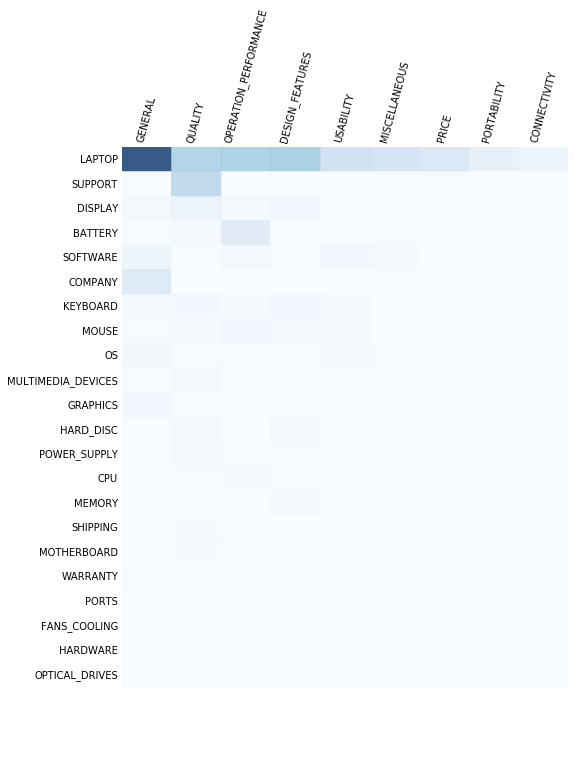

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

data = category_counts_arr

# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(8, 11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

ax.set_xticklabels(attribute_sorted, minor=False)
ax.set_yticklabels(entity_sorted, minor=False)

# rotate the
plt.xticks(rotation=75)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
plt.savefig('heatmap.png',bbox_inches='tight')
